2.1

In [117]:
import numpy as np
from matplotlib import pyplot as plt

In [118]:
def ex2_1(g, a, b, N, method):
    tot = 0
    if (method == "midpoint"):
        for i in range(0, N):
            tot += g(a + (((2*i)+1)*(b-a))/(2*N))
        tot = tot * ((b-a) / N)
        return tot
    elif (method == 'trapezoid'):      
        tot += g(a)
        tot += g(b)
        for i in range(1, N):
            tot += (2 * g(a + ((i*(b-a))/N)))
        tot = tot * ((b-a) / (2*N))
        return tot 
    elif method == 'Simpsons':
        tot += g(a)
        tot += g(b)
        for i in range(1, 2*N):
            if (i%2 == 1):
                tot += ( 4 * g(a + ((i*(b-a))/(2*N))) )
            else:
                tot += ( 2 * g(a + ((i*(b-a))/(2*N))) )
        tot = tot * ((b-a) / (6*N))
        return tot
    else:
        raise ValueError("method must be trapezoid, midpoint or simpsons")
    

In [119]:
f = lambda x: .1*(x**4) - 1.5*(x**3) + .53*(x**2) + 2*x + 1
print(ex2_1(f, -10, 10, 100, 'midpoint'))
print(ex2_1(f, -10, 10, 100, 'trapezoid'))
print(ex2_1(f, -10, 10, 100, 'Simpsons'))

4371.964759999999
4376.070560000001
4373.3333600000005


2.2

In [120]:
from scipy import stats

In [121]:
x = np.linspace(-10, 10, 10)
stats.norm.cdf(x)


array([7.61985302e-24, 3.69047871e-15, 1.38365090e-08, 4.29060333e-04,
       1.33260263e-01, 8.66739737e-01, 9.99570940e-01, 9.99999986e-01,
       1.00000000e+00, 1.00000000e+00])

In [181]:
def ex2_2(mu, sd, N, k):
    x = np.linspace(mu - sd*k, mu + sd*k, N)
    w = np.zeros_like(x)
    for i in range(N):
        if (i == 0):
            w[i-1] = stats.norm.cdf((x[1] + x[0])/2, loc = mu, scale = sd)
        elif i > 0 and i < N-1:
            w[i] = (stats.norm.cdf((x[i] + x[i+1])/2, loc = mu, scale = sd) - 
                   stats.norm.cdf((x[i] + x[i-1])/2, loc = mu, scale = sd) )
        else:
            w[i] =  (1 - stats.norm.cdf((x[N-1] + x[N-2])/2, loc = mu, scale = sd))
    return (x, w)
    

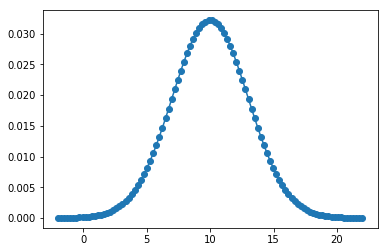

In [255]:
z, w = ex2_2(10, 3, 100, 4)

plt.plot(z,w, 'o-')

2.3

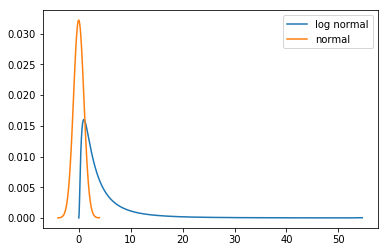

In [265]:
def ex2_3(mu, sd, N, k):
    z, w = ex2_2(mu, sd, N, k)
    z1 = np.exp(z)
    return z1, w


z_l, w_l = ex2_3(0, 1, 200, 4)
z, w = ex2_2(0, 1, 100, 4)
fig = plt.figure()
#plt.plot(z, w, label = "normal")
plt.plot(z_l, w_l, label = "log normal")
plt.plot(z,w, label="normal")
plt.legend(loc = "upper right")

2.4

In [271]:
z, w = ex2_3(10.5, .8, 100, 5)
rv = 0
for i in range(len(z)):
    rv += z[i]*w[i]
    
print(rv)

val = np.exp(10.5 + .32)
print(val)

50024.59670953277
50011.087008521754


3.1

In [28]:
from scipy.optimize import root
import numpy as np

f = lambda x: .1*(x**4) - 1.5*(x**3) + .53*(x**2) + 2*x + 1

def eq(v):
    w1, w2, w3, x1, x2, x3 = v 
    rv = []
    for i in range(0, 6):
        eq = (((-10 ** i+1) + (10 ** i+1)) / (i+1)) - (w1*(x1**i) + w2*(x2**i) + w3*(x3**i))
        rv.append(eq)

    return rv


def solver1():
    rv =  root(eq, ([.5, .5, .5, .5, .5, .5]), method = 'hybr').x
    return rv

def answer():
    l = solver1()
    print(l)
    rv = 0
    for i in range(3):
        rv += l[i] * f(l[i+3])
    return rv

answer()


[ 0.86701514 -0.08452352  1.2113579   0.13930057  0.77447822  0.77103562]


3.5984997411925637

3.2

In [30]:
from scipy.integrate import quad 
f = lambda x: .1*(x**4) - 1.5*(x**3) + .53*(x**2) + 2*x + 1
quad(f, -10, 10)


(4373.333333333334, 8.109531705284936e-11)

4.1

In [49]:
import numpy as np
import random


def bool_circle(x):
    if (x[0]**2 + x[1]**2 < 1) :
        return 1
    return 0

def func4_1(g, omega, N):
    random.seed = 25
    hit = 0
    for i in range(N):
        hit += g([random.uniform(omega[0,0], omega[0,1]), random.uniform(omega[1,0], omega[1,1])]) 
    return  ( 4 * hit ) / N

om = np.array([[-1,1],[-1,1]])

for i in range(1, 10000000):
    tmp = func4_1(bool_circle, om, i) 
    print(tmp)
    if (abs(tmp - np.pi) < .00001):
        print("Iteration: {}".format(i+1))
        break
        



4.0
2.0
2.6666666666666665
4.0
4.0
3.3333333333333335
2.2857142857142856
3.5
3.5555555555555554
4.0
2.909090909090909
3.6666666666666665
3.3846153846153846
3.7142857142857144
2.6666666666666665
2.75
3.5294117647058822
3.111111111111111
3.3684210526315788
2.8
3.619047619047619
3.6363636363636362
3.130434782608696
3.0
3.36
2.923076923076923
3.259259259259259
3.0
3.4482758620689653
3.066666666666667
3.3548387096774195
3.375
3.1515151515151514
2.7058823529411766
3.085714285714286
3.111111111111111
3.2432432432432434
3.5789473684210527
2.6666666666666665
3.7
3.1219512195121952
2.761904761904762
3.255813953488372
3.272727272727273
3.111111111111111
3.0434782608695654
3.148936170212766
3.25
2.7755102040816326
2.88
3.215686274509804
3.0
3.169811320754717
3.259259259259259
3.0545454545454547
3.2857142857142856
3.087719298245614
3.2413793103448274
3.5254237288135593
3.2666666666666666
3.278688524590164
2.903225806451613
3.3015873015873014
3.3125
3.1384615384615384
3.090909090909091
3.04477611940

3.3047034764826178
3.1020408163265305
3.1934826883910388
3.089430894308943
3.099391480730223
3.08502024291498
3.0464646464646465
3.1774193548387095
3.0824949698189137
3.1646586345381524
3.214428857715431
3.184
3.2175648702594812
3.1075697211155378
3.029821073558648
3.142857142857143
3.1366336633663368
3.0434782608695654
3.0453648915187377
3.141732283464567
3.104125736738703
3.152941176470588
3.0293542074363993
3.1171875
3.1267056530214425
3.252918287937743
3.0679611650485437
3.131782945736434
2.9941972920696327
3.2895752895752897
3.1753371868978806
3.1769230769230767
3.201535508637236
3.256704980842912
3.12810707456979
3.114503816793893
2.994285714285714
3.1634980988593155
3.074003795066414
3.007575757575758
3.100189035916824
3.1849056603773587
3.0433145009416194
3.2781954887218046
3.054409005628518
3.1760299625468167
3.0579439252336447
3.1417910447761193
3.188081936685289
3.100371747211896
3.1094619666048238
3.096296296296296
3.22365988909427
3.1365313653136533
3.130755064456722
3.220

3.1677282377919322
3.1558854718981975
3.1610169491525424
3.094179894179894
3.1374207188160677
3.1932418162618794
3.19831223628692
3.1401475237091674
3.0989473684210527
3.1882229232386963
3.138655462184874
3.1101783840503674
3.0146750524109014
3.1329842931937173
3.079497907949791
3.1765935214211076
3.164926931106472
3.1282586027111576
3.125
3.121748178980229
3.135135135135135
3.115264797507788
3.066390041493776
3.229015544041451
3.1055900621118013
3.1892450879007237
3.1115702479338845
3.1578947368421053
3.1463917525773195
3.114315139031926
3.1481481481481484
3.091469681397739
3.0924024640657084
3.1056410256410256
3.19672131147541
3.18935516888434
3.165644171779141
3.1828396322778345
3.2122448979591836
3.176350662589195
3.144602851323829
3.104781281790437
3.182926829268293
3.110659898477157
3.127789046653144
3.0638297872340425
3.1902834008097165
3.154701718907988
3.0747474747474746
3.2411705348133197
3.2338709677419355
3.085599194360524
3.1509054325955734
3.0954773869346734
3.19678714859

3.1194244604316546
3.209202012940331
3.1350574712643677
3.287867910983489
3.1190817790530847
3.174193548387097
3.180515759312321
3.189692197566213
3.055793991416309
3.1536812008577555
3.1942857142857144
3.2034261241970023
3.1126961483594866
3.0563079116179614
3.0142450142450143
3.0718861209964414
3.217638691322902
3.1869225302061124
3.1363636363636362
3.1227821149751596
3.0354609929078014
3.087172218284904
3.1529745042492916
3.2073602264685066
3.1683168316831685
3.0473498233215546
3.093220338983051
3.1305575158786167
3.153737658674189
3.0979563072586327
3.1352112676056336
3.099225897255454
3.1701828410689172
3.0751932536893887
3.0758426966292136
3.0933333333333333
3.1248246844319776
3.1450595655220743
3.0588235294117645
3.1518544436669
3.141258741258741
3.116701607267645
3.17877094972067
3.143056524773203
3.1492329149232914
3.1693379790940766
3.105849582172702
3.0897703549060545
3.1043115438108484
3.218902015288395
3.1694444444444443
3.156141568355309
3.090152565880721
3.11573111573111

3.1630434782608696
3.1309071156979904
3.1574375678610207
3.060227889310906
3.156182212581345
3.1523035230352305
3.1505958829902494
3.1077422847861396
3.158008658008658
3.136830719307734
3.1286486486486487
3.1442463533225284
3.058315334773218
3.1214247166756612
3.1521035598705502
3.1482479784366575
3.0797413793103448
3.1663974151857834
3.1733046286329385
3.0898332436793976
3.1333333333333333
3.1638903815153143
3.1149301825993554
3.1497584541062804
3.1952789699570814
3.039142091152815
3.1961414790996785
3.177289769683985
3.147751605995717
3.1054039593365435
3.0631016042780748
3.121325494388028
3.1837606837606836
3.171382808328884
3.1483457844183564
3.1232
3.213219616204691
3.149706979222163
3.16506922257721
3.1782863225119744
3.1659574468085108
3.145135566188198
3.1158342189160466
3.124800849707913
3.21656050955414
3.1575596816976126
3.1452810180275717
3.12241653418124
3.141949152542373
3.1445209105346743
3.121693121693122
3.0946589106292968
3.120507399577167
3.0765979926043316
3.1383315

3.2069868995633186
3.1130510694020077
3.1535776614310644
3.094635848233755
3.1124673060156933
3.149455337690632
3.1411149825783973
3.1850239442751413
3.1087902523933857
3.1752936059156154
3.203478260869565
3.1481964363320296
3.1450912250217202
3.122883195831524
3.1458333333333335
3.203470715835141
3.1465741543798784
3.05504984828782
3.197573656845754
3.170203551320918
3.1844155844155844
3.11726525313717
3.129757785467128
3.154345006485084
3.1840968020743303
3.198272138228942
3.160621761658031
3.138541217091066
3.1320103537532353
3.1289348857266064
3.132758620689655
3.186557518311073
3.1266149870801034
3.147653895824365
3.144578313253012
3.2068817204301077
3.062768701633706
3.1405242801890845
3.1597938144329896
3.086303134392443
3.1296137339055794
3.1505791505791505
3.1457975986277873
3.1650235747963995
3.167095115681234
3.1126338329764454
3.1489726027397262
3.1236628155755244
3.1531223267750215
3.0936297563061137
3.082051282051282
3.0875694147800083
3.1460290350128095
3.172001707212974